In [2]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

print("Setup complete")


Setup complete


In [3]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

print("Libraries loaded ")


Libraries loaded 


In [6]:
# Load CSV from raw data folder
df = pd.read_csv(r"A:\Social-media-sentiment\data\raw\Nykaa_Product_Review.csv")
df.head()


,Product Id,Product Brand Code,Retailer,Product Category,Product Brand,Product Name,Product Price,Product Url,Market,Product Description,Product Currency,Product Image Url,Product Tags,Product Contents,Product Rating,Product Reviews Count,Expected Category Count,Expected Brand Count
0,b77f3da33be6e65f6183da6ada8c07ca,BZ1000,nykaa.com,Makeup > Face > Contour,ETUDE HOUSE,ETUDE HOUSE Face Color Shading - 02,600,https://www.nykaa.com/c/p/760922?skuId=760920,IN,Etude House Face Color Shading provides a shad...,INR,https://images-static.nykaa.com/media/catalog/...,"ETUDE HOUSE Face Color Shading - 02, Makeup, F...",NaN,4.6,4.0,153,82
1,f54658c5d511195b6621a640fb743b1b,BH5931,nykaa.com,Brand > L'Oreal Paris,L'Oreal Paris,L'Oreal Paris Glow Mon Amour Highlighting Drop...,454,https://www.nykaa.com/c/p/565974?skuId=565973,IN,It's time to skip the snooze button and get up...,INR,https://images-static.nykaa.com/media/catalog/...,L'Oreal Paris Glow Mon Amour Highlighting Drop...,"G927637, Cyclopentasiloxane, Dimethicone, Isod...",4.3,147.0,431,431
2,cdf6b3387f8976c8e38ad150173dbb6d,BH7276,nykaa.com,Makeup > Face > Foundation,The Body Shop,The Body Shop All-In-One Face Base - 045,1395,https://www.nykaa.com/c/p/31142?skuId=30050,IN,Note: The Body Shop products will be dispatche...,INR,https://images-static.nykaa.com/media/catalog/...,"The Body Shop All-In-One Face Base - 045 , Mak...",NaN,4.4,58.0,0,0
3,424755c11c78b2b24ff13c675baf5d19,BZ1000,nykaa.com,Health & Wellness > Good for You > Super Food,True Elements,True Elements Sunflower Raw Seeds,175,https://www.nykaa.com/c/p/370883?skuId=370881,IN,Sunflower has always been admired for its beau...,INR,https://images-static.nykaa.com/media/catalog/...,"True Elements Sunflower Raw Seeds, Wellness, S...",Raw Sunflower Seeds,5,0.0,389,149
4,f7f76573099db0058ef5264c35d9d02e,BZ1000,nykaa.com,Makeup > Lips > Lip Stain,Nykaa Cosmetics,Nykaa Wonderpuff Cushion Liquid Lipstick - Wer...,539,https://www.nykaa.com/c/p/555315?skuId=555310,IN,It's no secret that a good lippie is a real mo...,INR,https://images-static.nykaa.com/media/catalog/...,NykaaÂ Wonderpuff!Â LipÂ &Â CheekÂ Cushion Lip...,NaN,4,934.0,80,436


In [9]:
df.columns


Index(['Product Id', 'Product Brand Code', 'Retailer', 'Product Category',
       'Product Brand', 'Product Name', 'Product Price', 'Product Url',
       'Market', 'Product Description', 'Product Currency',
       'Product Image Url', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Expected Category Count',
       'Expected Brand Count'],
      dtype='object')

In [14]:
df["clean_review"] = df["Product Description"].apply(clean_text)


In [15]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)          # remove URLs
    text = re.sub(r"[^\w\s]", "", text)          # remove punctuation
    text = re.sub(r"\d+", "", text)              # remove numbers
    return text.strip()

df["clean_review"] = df["Product Description"].apply(clean_text)
df.head()


,Product Id,Product Brand Code,Retailer,Product Category,Product Brand,Product Name,Product Price,Product Url,Market,Product Description,Product Currency,Product Image Url,Product Tags,Product Contents,Product Rating,Product Reviews Count,Expected Category Count,Expected Brand Count,clean_review
0,b77f3da33be6e65f6183da6ada8c07ca,BZ1000,nykaa.com,Makeup > Face > Contour,ETUDE HOUSE,ETUDE HOUSE Face Color Shading - 02,600,https://www.nykaa.com/c/p/760922?skuId=760920,IN,Etude House Face Color Shading provides a shad...,INR,https://images-static.nykaa.com/media/catalog/...,"ETUDE HOUSE Face Color Shading - 02, Makeup, F...",NaN,4.6,4.0,153,82,etude house face color shading provides a shad...
1,f54658c5d511195b6621a640fb743b1b,BH5931,nykaa.com,Brand > L'Oreal Paris,L'Oreal Paris,L'Oreal Paris Glow Mon Amour Highlighting Drop...,454,https://www.nykaa.com/c/p/565974?skuId=565973,IN,It's time to skip the snooze button and get up...,INR,https://images-static.nykaa.com/media/catalog/...,L'Oreal Paris Glow Mon Amour Highlighting Drop...,"G927637, Cyclopentasiloxane, Dimethicone, Isod...",4.3,147.0,431,431,its time to skip the snooze button and get up ...
2,cdf6b3387f8976c8e38ad150173dbb6d,BH7276,nykaa.com,Makeup > Face > Foundation,The Body Shop,The Body Shop All-In-One Face Base - 045,1395,https://www.nykaa.com/c/p/31142?skuId=30050,IN,Note: The Body Shop products will be dispatche...,INR,https://images-static.nykaa.com/media/catalog/...,"The Body Shop All-In-One Face Base - 045 , Mak...",NaN,4.4,58.0,0,0,note the body shop products will be dispatched...
3,424755c11c78b2b24ff13c675baf5d19,BZ1000,nykaa.com,Health & Wellness > Good for You > Super Food,True Elements,True Elements Sunflower Raw Seeds,175,https://www.nykaa.com/c/p/370883?skuId=370881,IN,Sunflower has always been admired for its beau...,INR,https://images-static.nykaa.com/media/catalog/...,"True Elements Sunflower Raw Seeds, Wellness, S...",Raw Sunflower Seeds,5,0.0,389,149,sunflower has always been admired for its beau...
4,f7f76573099db0058ef5264c35d9d02e,BZ1000,nykaa.com,Makeup > Lips > Lip Stain,Nykaa Cosmetics,Nykaa Wonderpuff Cushion Liquid Lipstick - Wer...,539,https://www.nykaa.com/c/p/555315?skuId=555310,IN,It's no secret that a good lippie is a real mo...,INR,https://images-static.nykaa.com/media/catalog/...,NykaaÂ Wonderpuff!Â LipÂ &Â CheekÂ Cushion Lip...,NaN,4,934.0,80,436,its no secret that a good lippie is a real moo...


In [16]:
analyzer = SentimentIntensityAnalyzer()

df["compound"] = df["clean_review"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
df["pos"] = df["clean_review"].apply(lambda x: analyzer.polarity_scores(x)["pos"])
df["neu"] = df["clean_review"].apply(lambda x: analyzer.polarity_scores(x)["neu"])
df["neg"] = df["clean_review"].apply(lambda x: analyzer.polarity_scores(x)["neg"])

def label_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["compound"].apply(label_sentiment)
df.head()


,Product Id,Product Brand Code,Retailer,Product Category,Product Brand,Product Name,Product Price,Product Url,Market,Product Description,...,Product Rating,Product Reviews Count,Expected Category Count,Expected Brand Count,clean_review,compound,pos,neu,neg,sentiment
0,b77f3da33be6e65f6183da6ada8c07ca,BZ1000,nykaa.com,Makeup > Face > Contour,ETUDE HOUSE,ETUDE HOUSE Face Color Shading - 02,600,https://www.nykaa.com/c/p/760922?skuId=760920,IN,Etude House Face Color Shading provides a shad...,...,4.6,4.0,153,82,etude house face color shading provides a shad...,0.9022,0.070,0.930,0.000,Positive
1,f54658c5d511195b6621a640fb743b1b,BH5931,nykaa.com,Brand > L'Oreal Paris,L'Oreal Paris,L'Oreal Paris Glow Mon Amour Highlighting Drop...,454,https://www.nykaa.com/c/p/565974?skuId=565973,IN,It's time to skip the snooze button and get up...,...,4.3,147.0,431,431,its time to skip the snooze button and get up ...,0.9962,0.189,0.805,0.006,Positive
2,cdf6b3387f8976c8e38ad150173dbb6d,BH7276,nykaa.com,Makeup > Face > Foundation,The Body Shop,The Body Shop All-In-One Face Base - 045,1395,https://www.nykaa.com/c/p/31142?skuId=30050,IN,Note: The Body Shop products will be dispatche...,...,4.4,58.0,0,0,note the body shop products will be dispatched...,0.9969,0.247,0.741,0.012,Positive
3,424755c11c78b2b24ff13c675baf5d19,BZ1000,nykaa.com,Health & Wellness > Good for You > Super Food,True Elements,True Elements Sunflower Raw Seeds,175,https://www.nykaa.com/c/p/370883?skuId=370881,IN,Sunflower has always been admired for its beau...,...,5,0.0,389,149,sunflower has always been admired for its beau...,0.9986,0.230,0.737,0.033,Positive
4,f7f76573099db0058ef5264c35d9d02e,BZ1000,nykaa.com,Makeup > Lips > Lip Stain,Nykaa Cosmetics,Nykaa Wonderpuff Cushion Liquid Lipstick - Wer...,539,https://www.nykaa.com/c/p/555315?skuId=555310,IN,It's no secret that a good lippie is a real mo...,...,4,934.0,80,436,its no secret that a good lippie is a real moo...,0.9975,0.165,0.811,0.024,Positive


In [17]:
df.to_csv(r"A:\Social-media-sentiment\data\processed\Nykaa_reviews_with_sentiment.csv", index=False)
print("Processed file saved")


Processed file saved


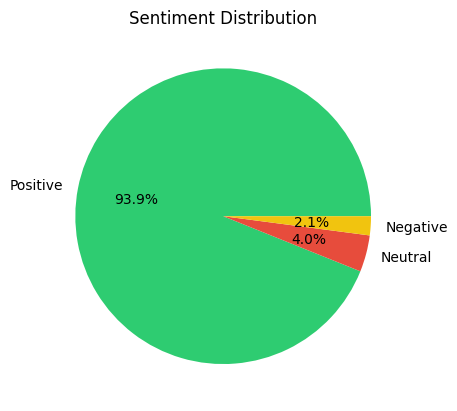

In [18]:
sent_counts = df["sentiment"].value_counts()
plt.pie(sent_counts, labels=sent_counts.index, autopct="%1.1f%%", 
        colors=["#2ecc71","#e74c3c","#f1c40f"])
plt.title("Sentiment Distribution")
plt.show()


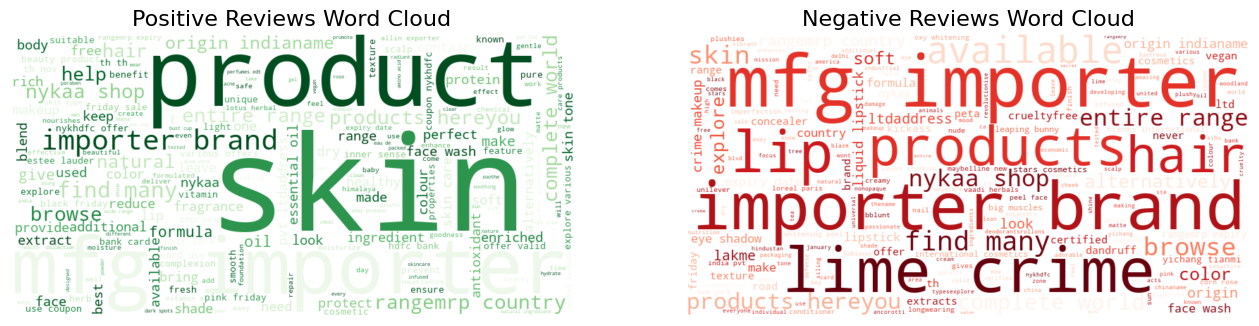

In [21]:
from wordcloud import WordCloud

# Positive word cloud
positive_text = " ".join(df[df["sentiment"] == "Positive"]["clean_review"])
positive_wc = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(positive_text)

# Negative word cloud
negative_text = " ".join(df[df["sentiment"] == "Negative"]["clean_review"])
negative_wc = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_text)

# Plot side-by-side
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

axs[0].imshow(positive_wc, interpolation="bilinear")
axs[0].set_title("Positive Reviews Word Cloud", fontsize=16)
axs[0].axis("off")

axs[1].imshow(negative_wc, interpolation="bilinear")
axs[1].set_title("Negative Reviews Word Cloud", fontsize=16)
axs[1].axis("off")

plt.show()
